# Regressão Logística: Prevendo Categorias

## 🎯 Objetivo da Aula
Aprender quando e como usar a regressão logística para prever **categorias**, especialmente em situações reais como churn de clientes, conversão de leads e respostas a campanhas.

## 🧠 O que é Regressão Logística?
A regressão logística é usada quando a variável que queremos prever (**variável dependente**) é **categórica**. Exemplo:

- Vai comprar ou não? (`0` ou `1`)
- Vai cancelar o plano? (`Sim` ou `Não`)
- Vai clicar no anúncio? (`True` ou `False`)

**Importante:** diferente da regressão linear, ela não prevê um número contínuo, mas **probabilidades** entre 0 e 1.

## 📌 Quando usar Regressão Logística?
- Quando a variável de saída (Y) tem **dois valores** (binária)
- Quando queremos estimar **probabilidade de ocorrência** de um evento
- Quando queremos classificar algo em **sim/não**, **0/1**, **positivo/negativo**

## 🌍 Aplicações reais
- **Churn**: prever se um cliente vai cancelar o plano
- **Conversão**: prever se um lead vai virar cliente
- **Campanha**: prever se alguém vai clicar no anúncio ou responder
- **Diagnóstico médico**: prever se um paciente tem ou não uma doença

## 🔧 Exemplo prático com dados simulados

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, roc_curve
)
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

np.random.seed(42)
n = 3000
idade = np.random.randint(18, 70, n)
salario = np.random.randint(2000, 15000, n)

# Combinação linear com peso + ruído
logit = -10 + 0.05 * idade + 0.0015 * salario + np.random.normal(0, 1, n)

# Aplicar função sigmoide (logística) para transformar em probabilidade
probabilidade_resposta = 1 / (1 + np.exp(-logit))

# Gerar resposta binária com base na probabilidade
resposta = np.random.binomial(1, probabilidade_resposta)

df = pd.DataFrame({'Idade': idade, 'Salario': salario, 'Respondeu': resposta})
df.head()

,Idade,Salario,Respondeu
0,56,12736,1
1,69,6875,1
2,46,3256,0
3,32,13182,1
4,60,9697,1


Y = a + bx (eq. da reta da regressão linear)

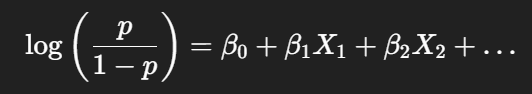

In [11]:
df.corr()

,Idade,Salario,Respondeu
Idade,1.000000,0.002029,0.078693
Salario,0.002029,1.000000,0.703895
Respondeu,0.078693,0.703895,1.000000


## Análise de multicolinearidade (VIF + Correlacao)

In [2]:
X = df[['Idade', 'Salario']]
X_const = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Variável"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print("\nVIF (Multicolinearidade):")
print(vif_data)


VIF (Multicolinearidade):
  Variável        VIF
0    const  14.492233
1    Idade   1.000004
2  Salario   1.000004


In [3]:
print("\nCorrelação entre variáveis:")
X.corr()


Correlação entre variáveis:


,Idade,Salario
Idade,1.000000,0.002029
Salario,0.002029,1.000000


## 🤖 Treinando uma Regressão Logística

In [21]:
X = df[['Idade', 'Salario']]
y = df['Respondeu']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:,1]
residuos = y_test - y_prob  # resíduo = real - previsto
print('Acurácia:', accuracy_score(y_test, y_pred))

Acurácia: 0.8866666666666667


## Visualização da dispersão  de resíduos

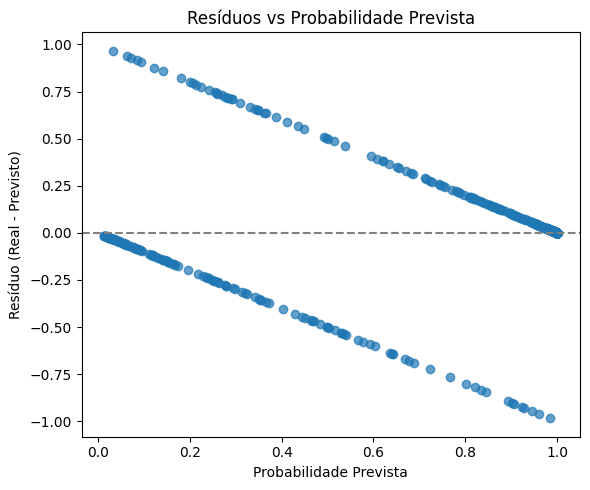

In [15]:
#Gráfico de resíduos vs. probabilidade prevista

plt.figure(figsize=(6, 5))
plt.scatter(y_prob, residuos, alpha=0.7)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Probabilidade Prevista')
plt.ylabel('Resíduo (Real - Previsto)')
plt.title('Resíduos vs Probabilidade Prevista')
plt.tight_layout()
plt.show()

#Esse padrão em “V” ou “duplo triângulo” é o comportamento natural da regressão logística

## 🧾 Interpretando os Coeficientes

logit = -10 + 0.05 * idade + 0.0015 * salario

In [16]:
X_const = sm.add_constant(X) #Adiciona uma constante (intercepto) ao conjunto de variáveis
modelo_logit = sm.Logit(y, X_const).fit() #Cria e ajusta um modelo de regressão logística com
print(modelo_logit.summary())

Optimization terminated successfully.
         Current function value: 0.199900
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Respondeu   No. Observations:                 3000
Model:                          Logit   Df Residuals:                     2998
Method:                           MLE   Df Model:                            1
Date:                Wed, 28 May 2025   Pseudo R-squ.:                  0.6490
Time:                        00:49:40   Log-Likelihood:                -599.70
converged:                       True   LL-Null:                       -1708.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.5794      0.301    -21.892      0.000      -7.168      -5.990
Salario        0.0013   5.51e

## 📊 Matriz de Confusão

| Resultado previsto | Resultado real | Nome técnico               |
| ------------------ | -------------- | -------------------------- |
| 1 (positivo)       | 1 (positivo)   | ✅ Verdadeiro Positivo (TP) |
| 0 (negativo)       | 0 (negativo)   | ✅ Verdadeiro Negativo (TN) |
| 1 (positivo)       | 0 (negativo)   | ❌ **Falso Positivo (FP)**  |
| 0 (negativo)       | 1 (positivo)   | ❌ **Falso Negativo (FN)**  |


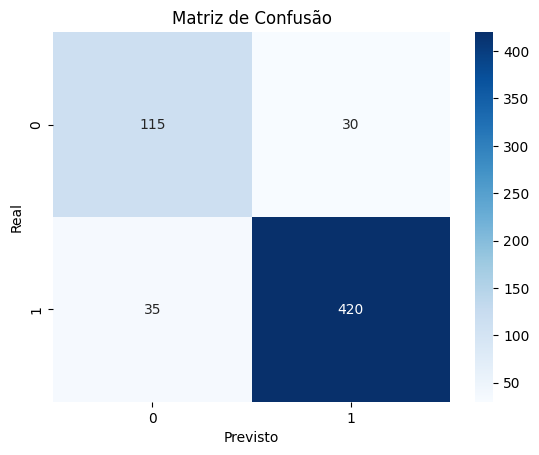

In [17]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

## Outras métricas

In [22]:
# Métricas
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Precisão:", precision_score(y_test, y_pred)) #Use se falsos positivos forem críticos (ex: spam, fraude bancária)
print("Recall:", recall_score(y_test, y_pred)) #Use se falsos negativos forem críticos (ex: doenças, falhas)
print("F1-Score:", f1_score(y_test, y_pred)) #Use para equilibrar precisão e recall (ex: churn, classificação de risco)
print("AUC:", roc_auc_score(y_test, y_prob)) #Use para avaliar o desempenho global do modelo (quanto maior, melhor)

Acurácia: 0.8866666666666667
Precisão: 0.9252747252747253
Recall: 0.9252747252747253
F1-Score: 0.9252747252747253
AUC: 0.9612428950359986


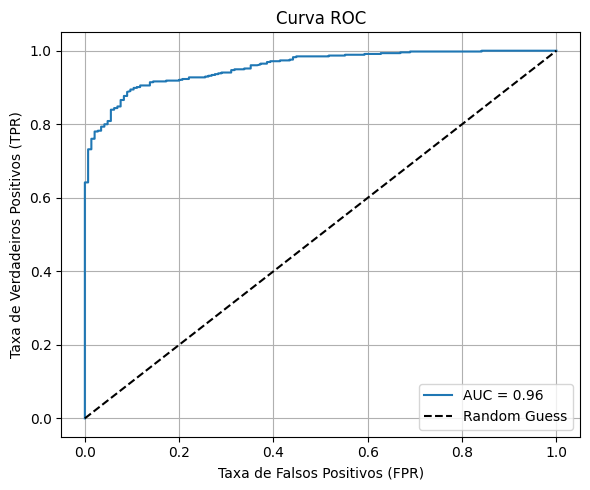

In [19]:
# Curva ROC - Quanto mais para o canto superior esquerdo, melhor o modelo.
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## ✅ Conclusões
- A regressão logística estima a **probabilidade** de um evento acontecer.
- Pode ser aplicada em diversos contextos reais (negócios, saúde, marketing).
- A interpretação dos coeficientes mostra **quanto cada variável influencia na chance de resposta**.